In [1]:
!tar -xzvf imdb_sentiment.tar.gz

model/
model/events.out.tfevents.1552106665.5bedd287906b
model/model.ckpt-10000.meta
model/data/
model/data/word_index.json
model/checkpoint
model/export/
model/export/model/
model/export/model/1552107126/
model/export/model/1552107126/saved_model.pb
model/export/model/1552107126/variables/
model/export/model/1552107126/variables/variables.data-00000-of-00001
model/export/model/1552107126/variables/variables.index
model/graph.pbtxt
model/model.ckpt-10000.index
model/model.ckpt-10000.data-00000-of-00001
model/model.ckpt-0.data-00000-of-00001
model/keras/
model/keras/checkpoint
model/keras/keras_model.ckpt.meta
model/keras/keras_model.ckpt.index
model/keras/keras_model.ckpt.data-00000-of-00001
model/model.ckpt-0.meta
model/model.ckpt-0.index
model/eval/
model/eval/events.out.tfevents.1552107125.5bedd287906b


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import predictor

from data.imdb import Tokenizer

In [3]:
tf.__version__

'1.13.1'

In [0]:
export_dir = "model/export/model/1552107126"
seq_len = 256
vocab_size = 2048

In [5]:
p = predictor.from_saved_model(
    export_dir, 
    input_names={"input_text": "input_text:0"}, 
    output_names={
        "prediction": "dense/Softmax:0",
        "attention_0": "attention/attention_weights:0",
        "attention_1": "attention_1/attention_weights:0",
    },
)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


W0309 12:26:24.113876 139877261084544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/predictor/saved_model_predictor.py:153: load (from tensorflow.python.saved_model.loader_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0309 12:26:24.446514 139877261084544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from model/export/model/1552107126/variables/variables


I0309 12:26:24.450069 139877261084544 saver.py:1270] Restoring parameters from model/export/model/1552107126/variables/variables


In [0]:
tok = Tokenizer(vocab_size, seq_len)

In [0]:
tok.load_index("model/data/word_index.json")

In [0]:
inputs = list(tok.transform([
    b"this movie is excellent", 
    b"this movie is good", 
    b"this movie sucks",
    b"That movie was absolutely awful",
    b"The acting was a bit lacking",
    b"The film was creative and surprising",
    b"Absolutely fantastic!"
]))

In [9]:
outputs = p({"input_text": inputs})
outputs["prediction"]

array([[1.4082144e-13, 1.0000000e+00],
       [5.4077881e-10, 1.0000000e+00],
       [1.0000000e+00, 8.3034458e-19],
       [1.0000000e+00, 1.5380016e-13],
       [5.9238362e-01, 4.0761638e-01],
       [2.6104544e-11, 1.0000000e+00],
       [3.5190692e-10, 1.0000000e+00]], dtype=float32)

In [0]:
inverted = { v: k for k, v in tok.index.items() }

In [0]:
enc_inp = inputs[4]

In [0]:
def get_word(i):
    if i in inverted:
        return inverted[i]
    elif i == 0:
        return "<PAD>"
    return "<UNK>"

In [13]:
inp = [get_word(i) for i in enc_inp]
inp[:6]

['the', 'acting', 'was', 'a', 'bit', 'lacking']

In [14]:
outputs["prediction"][4]

array([0.5923836 , 0.40761638], dtype=float32)

In [0]:
att_0 = outputs["attention_0"][8*4:8*5]
att_1 = outputs["attention_1"][8*4:8*5]

In [0]:
att_0 = [att_0[i] for i in range(8)]
att_1 = [att_1[i] for i in range(8)]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

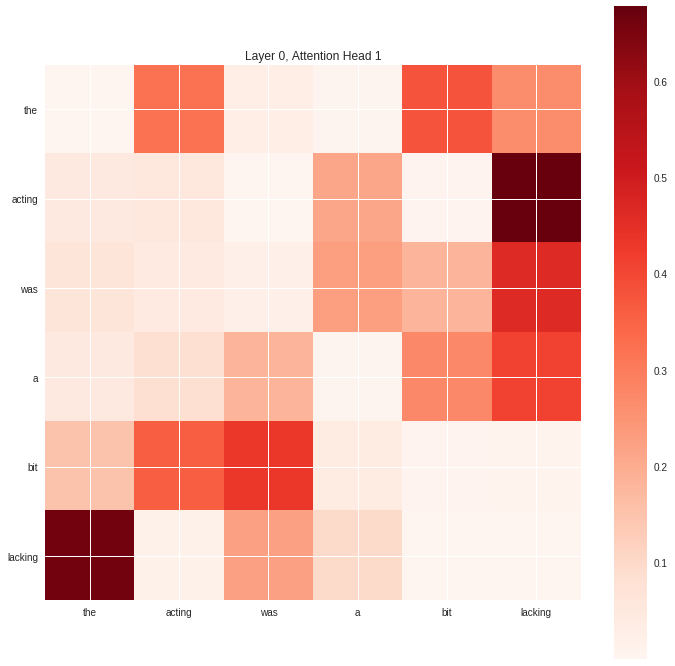

<Figure size 432x288 with 0 Axes>

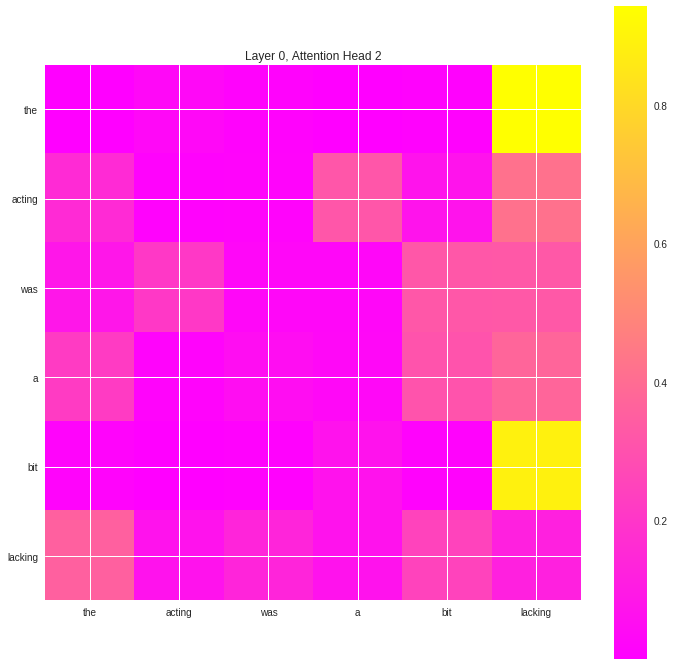

<Figure size 432x288 with 0 Axes>

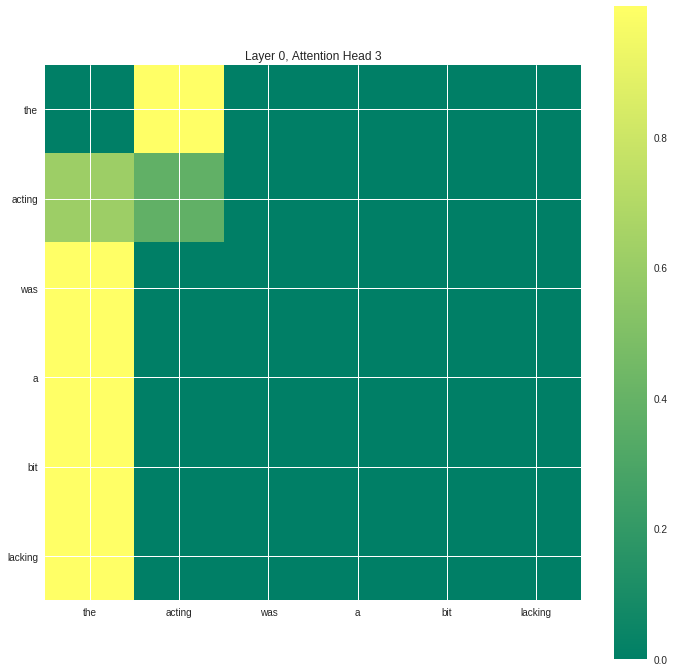

<Figure size 432x288 with 0 Axes>

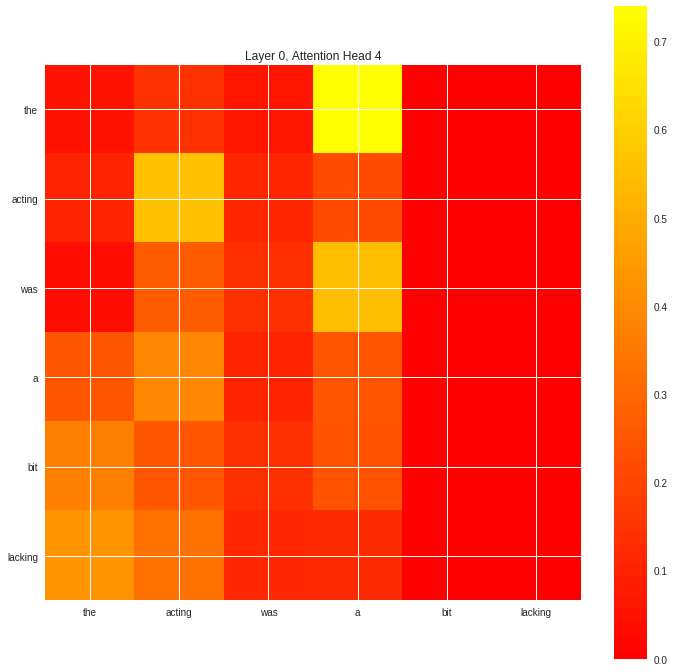

<Figure size 432x288 with 0 Axes>

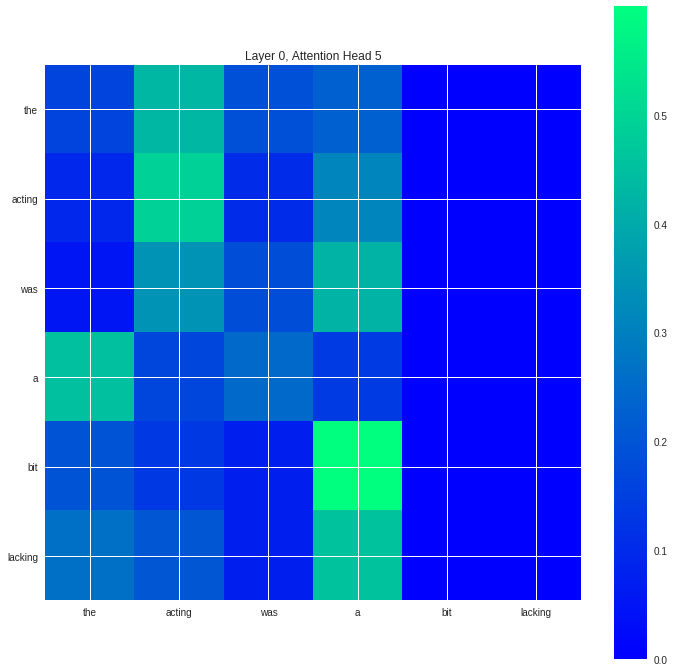

<Figure size 432x288 with 0 Axes>

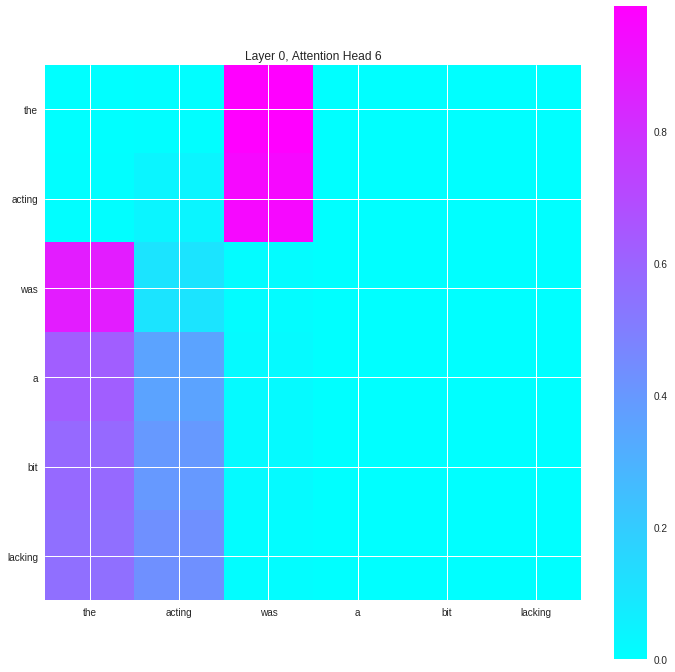

<Figure size 432x288 with 0 Axes>

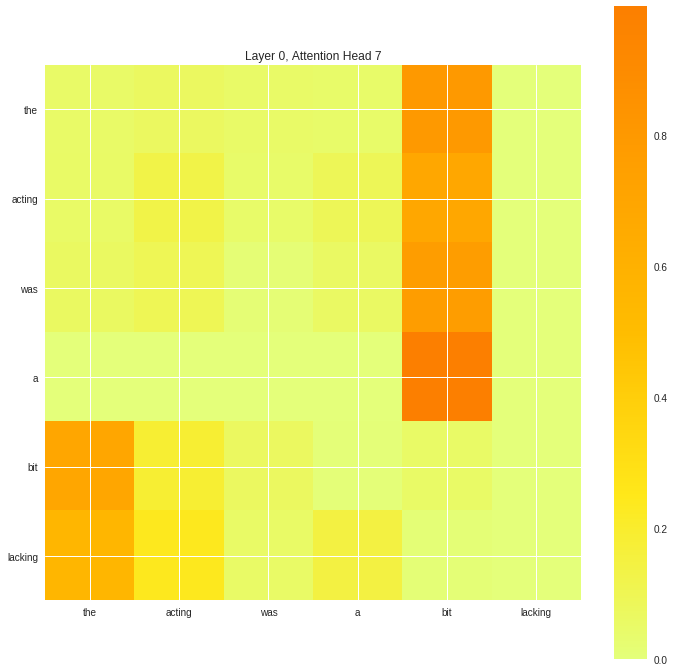

<Figure size 432x288 with 0 Axes>

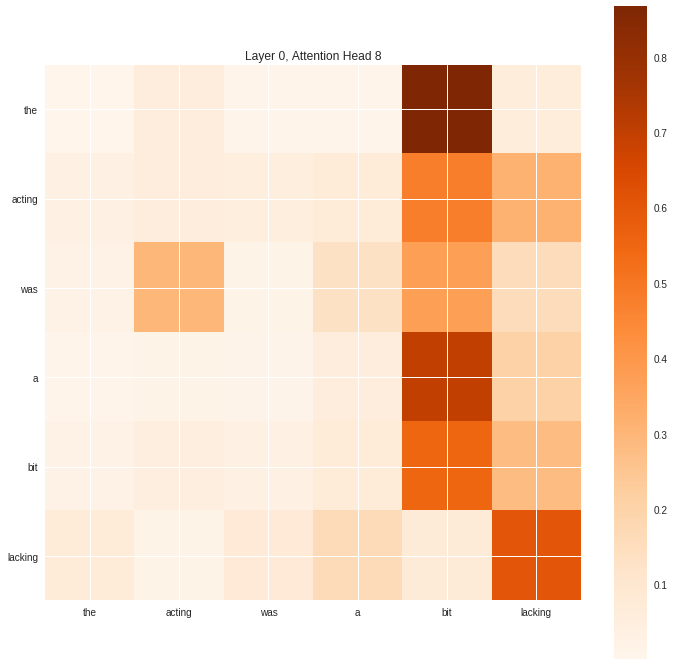

In [18]:
# https://matplotlib.org/users/colormaps.html
for i, cmap in enumerate(["Reds", "spring", "summer", "autumn", "winter", "cool", "Wistia", "Oranges"]):
    fig = plt.figure()
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    heatplot = ax.imshow(att_0[i][:6, :6], cmap=cmap)
    ax.set_xticks(np.arange(6))
    ax.set_yticks(np.arange(6))
    ax.set_xticklabels(inp[:6])
    ax.set_yticklabels(inp[:6])
    plt.colorbar(heatplot)
    plt.title("Layer 0, Attention Head %d" % (i + 1))

<Figure size 432x288 with 0 Axes>

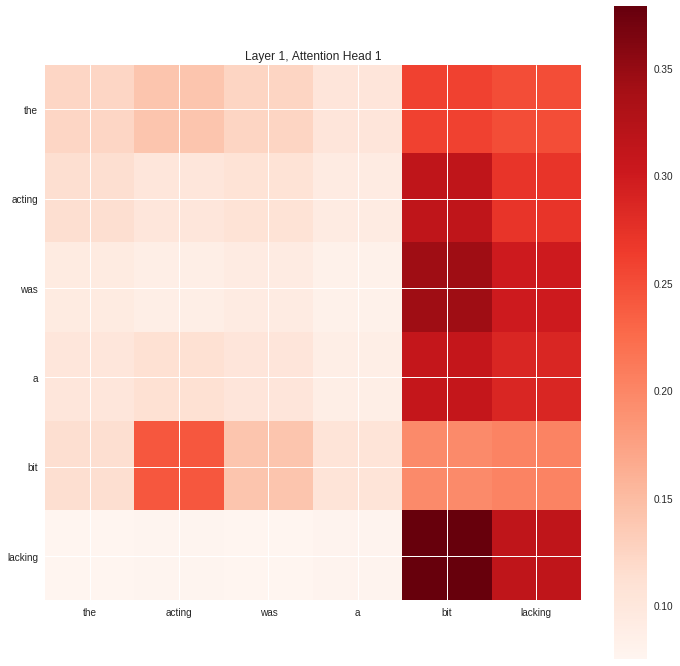

<Figure size 432x288 with 0 Axes>

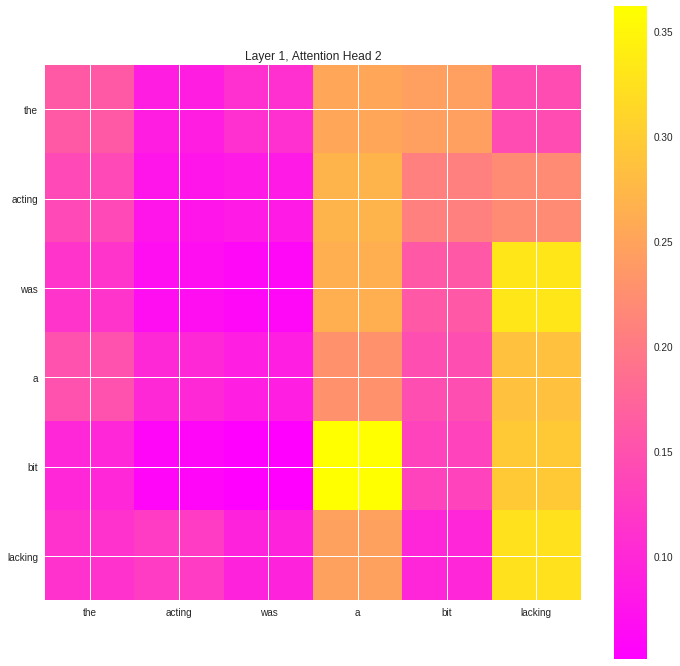

<Figure size 432x288 with 0 Axes>

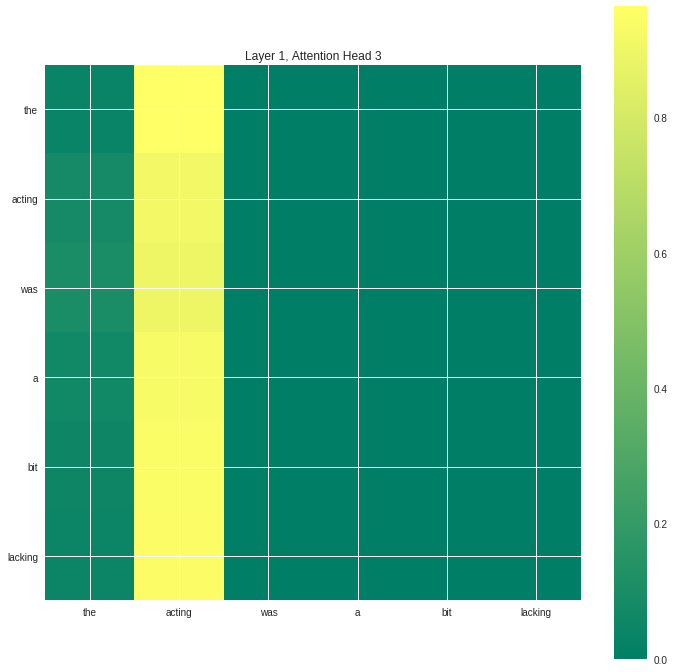

<Figure size 432x288 with 0 Axes>

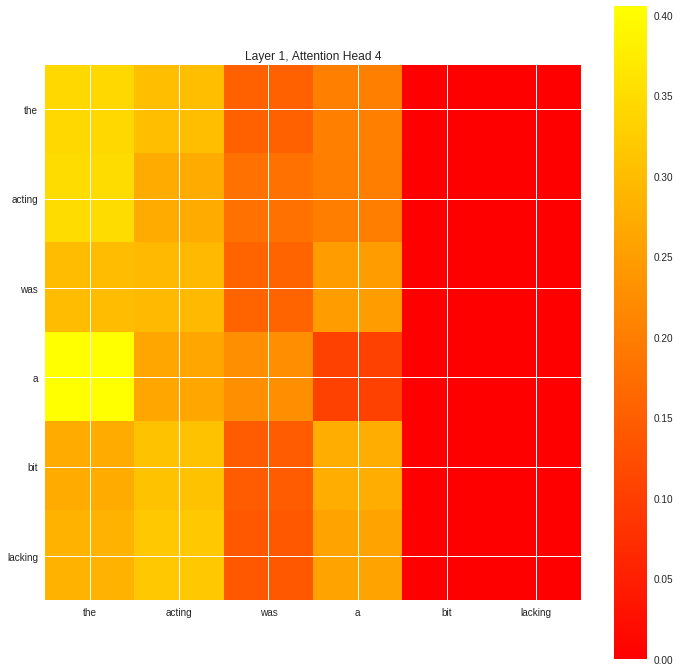

<Figure size 432x288 with 0 Axes>

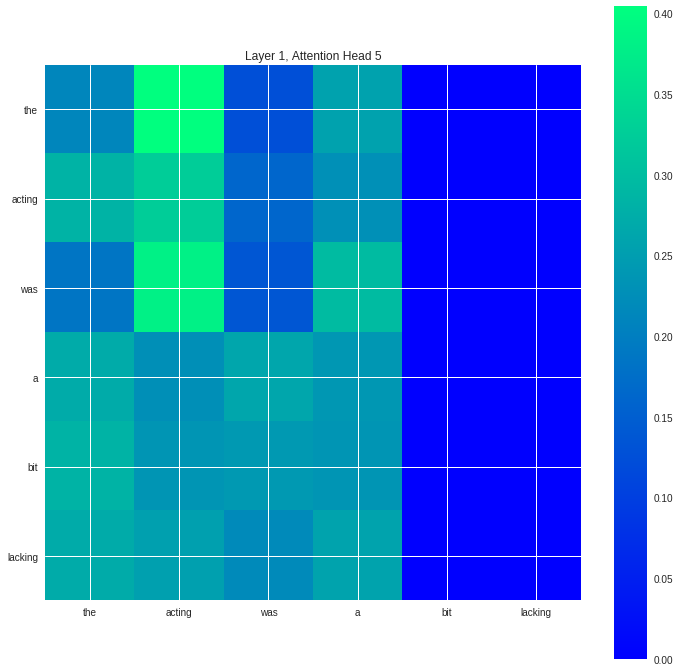

<Figure size 432x288 with 0 Axes>

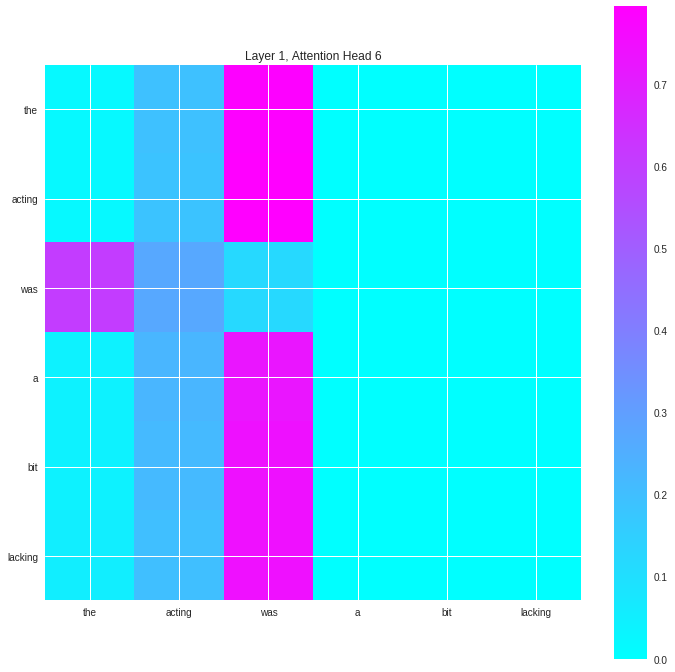

<Figure size 432x288 with 0 Axes>

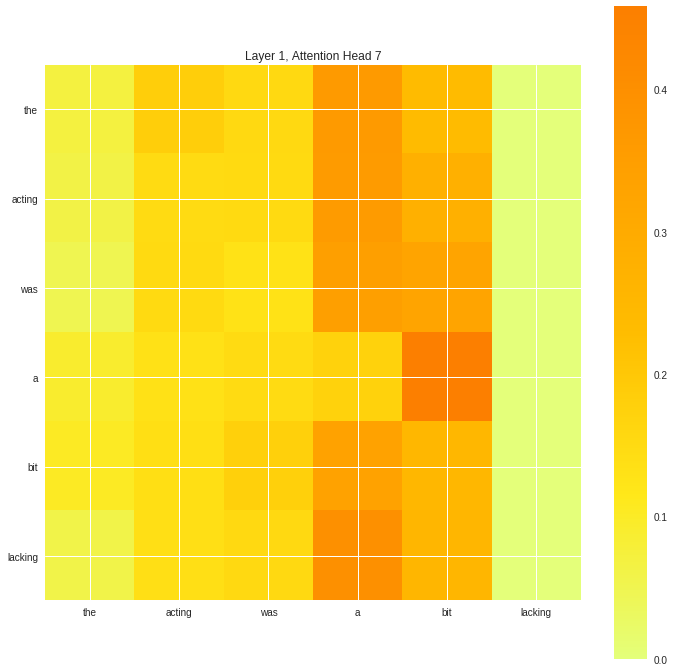

<Figure size 432x288 with 0 Axes>

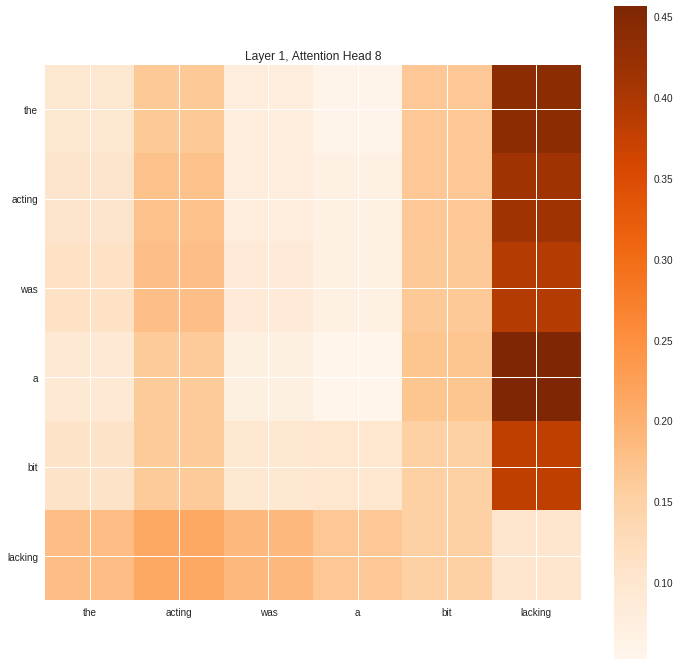

In [19]:
# https://matplotlib.org/users/colormaps.html
for i, cmap in enumerate(["Reds", "spring", "summer", "autumn", "winter", "cool", "Wistia", "Oranges"]):
    fig = plt.figure()
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    heatplot = ax.imshow(att_1[i][:6, :6], cmap=cmap)
    ax.set_xticks(np.arange(6))
    ax.set_yticks(np.arange(6))
    ax.set_xticklabels(inp[:6])
    ax.set_yticklabels(inp[:6])
    plt.colorbar(heatplot)
    plt.title("Layer 1, Attention Head %d" % (i + 1))